<a href="https://colab.research.google.com/github/faizansk25/MOVIERECOMMENDEDSYSTEM/blob/main/MovieRecommendedSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📽️🎬 **Movies Recommendation System**
---

## 🔍 **Project Overview**
This project is focused on building a **Movies Recommendation System** using various Natural Language Processing (NLP) techniques. The goal is to recommend movies based on user preferences using **TF-IDF Vectorization** and **Cosine Similarity** algorithms.

---

### 📑 **Project Details**
- **Project**: Movies Recommendation System
- **Developed by**: **Faizan Muktar Shaikh**
- **Internship at**: AvaIntern
- **Platform**: Google Colab

---

## 🛠️ **Libraries and Tools Used**
- **Python**: Programming Language
- **NumPy & Pandas**: Data Manipulation
- **Difflib**: String Matching
- **Scikit-learn**: TF-IDF Vectorizer & Cosine Similarity
- **Google Colab**: Cloud-based development environment

---

## 📚 **Theoretical Concepts Used**
1. **TF-IDF (Term Frequency-Inverse Document Frequency)**:
   - Evaluates the importance of words in a document relative to a corpus.
2. **Cosine Similarity**:
   - Measures similarity between text vectors to recommend similar movies.
3. **Pandas & NumPy**:
   - Efficiently handle and preprocess the dataset.

---

## 🚀 **Project Objectives**
1. **Load and preprocess** a dataset of movies.
2. **Extract features** from movie descriptions using TF-IDF.
3. **Compute similarities** between movies using Cosine Similarity.
4. **Recommend** movies based on user input or movie titles.

---

## 📊 **Dataset**
- The dataset used includes a collection of movies, their genres, descriptions, and ratings.
- Data source: [Provide dataset link if applicable]

---

## 🧑‍💻 **Acknowledgements**
Special thanks to **AvaIntern** for providing this internship opportunity and support throughout the project.

---

## 👨‍🏫 **How to Run the Code**
1. Open this notebook in **Google Colab**.
2. Install the necessary libraries (if not pre-installed).
3. Follow along with the code and markdown cells to understand the implementation.


In [ ]:
import numpy as np


NumPy is a powerful library for numerical computing in Python. It provides support for multi-dimensional arrays, matrices, and mathematical functions to operate on these arrays efficiently.

NumPy is commonly used for handling large datasets, performing linear algebra, statistical analysis, and other numerical computations efficiently.

In [ ]:
import pandas as pd

Pandas is a popular data analysis library that provides data structures like DataFrames and Series, which are essential for handling and analyzing structured data.
It's particularly useful for data manipulation, cleaning, and analysis. Pandas allows easy reading, filtering, grouping, and joining of data from various sources like CSV, Excel files, and SQL databases.

In [ ]:
import difflib

 Difflib is a module used for comparing sequences, such as strings or lists, to identify differences. It can be used to find the closest matches, which is helpful in text processing and string matching.
 Useful for applications like spell-checking, data deduplication, or matching similar text entries.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

This imports the TfidfVectorizer class from the sklearn.feature_extraction.text module.
TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical method used to evaluate how important a word is to a document in a collection. It combines:

**Term Frequency (TF):** Measures how frequently a term appears in a document.

**Inverse Document Frequency (IDF):** Measures how common or rare a word is across the entire collection.

TF-IDF helps convert raw text data into numerical vectors, which can then be used as input for machine learning models or similarity calculations. It emphasizes words that are more meaningful to specific documents.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

This imports the ***cosine_similarity*** function **from the sklearn.metrics.pairwise** module.
Cosine Similarity is a measure of similarity between two non-zero vectors. It calculates the cosine of the angle between the vectors, resulting in a value between -1 (completely opposite) and +1 (completely similar).
The formula is:
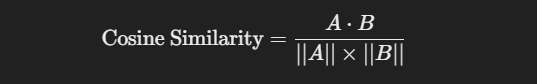

where
𝐴
A and
𝐵
B are vectors, and
⋅
⋅ represents the dot product, while
∣
∣
𝐴
∣
∣
∣∣A∣∣ and
∣
∣
𝐵
∣
∣
∣∣B∣∣ are their magnitudes.

Commonly used in text analysis, information retrieval, and recommendation systems to measure similarity between documents or text embeddings.

In [ ]:
# Load the data from the CSV file into a pandas DataFrame
movies_data = pd.read_csv('/content/movies.csv')

In [ ]:
# Display the first 5 rows of the DataFrame
print(movies_data.head())

   index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   
2      2  245000000                    Action Adventure Crime   
3      3  250000000               Action Crime Drama Thriller   
4      4  260000000          Action Adventure Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   
2         spy based on novel sec

In [ ]:
# Check the number of rows and columns in the DataFrame
print(f"Shape of the dataset: {movies_data.shape}")

Shape of the dataset: (4803, 24)


In [ ]:
# Select the relevant features for recommendations
selected_features = ['genres', 'keywords', 'tagline', 'cast', 'director']
print("Selected features:", selected_features)


Selected features: ['genres', 'keywords', 'tagline', 'cast', 'director']


In [ ]:

# Replace null values with empty strings
for feature in selected_features:
    movies_data[feature] = movies_data[feature].fillna('')

In [ ]:
# Combine all the selected features into a single string
combined_features = (
    movies_data['genres'] + ' ' +
    movies_data['keywords'] + ' ' +
    movies_data['tagline'] + ' ' +
    movies_data['cast'] + ' ' +
    movies_data['director']
)

In [ ]:
# Convert the text data into feature vectors
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)

In [ ]:
# Calculate the cosine similarity between feature vectors
similarity = cosine_similarity(feature_vectors)


In [ ]:

# Function to get movie recommendations
def get_movie_recommendations(movie_name, num_recommendations=10):
    # Create a list of all movie titles in the dataset
    list_of_all_titles = movies_data['title'].tolist()

    # Find the closest match for the input movie name
    find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles, n=1, cutoff=0.6)

    # Handle cases where no match is found
    if not find_close_match:
        print(f"No close match found for '{movie_name}'. Please try again with a different title.")
        return

    # Get the best match and its index
    close_match = find_close_match[0]
    index_of_the_movie = movies_data[movies_data.title == close_match].index[0]

    # Get similarity scores for all movies
    similarity_score = list(enumerate(similarity[index_of_the_movie]))

    # Sort movies based on similarity scores in descending order
    sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)

    print(f"\nMovies suggested for you based on '{close_match}':\n")

    i = 0
    for movie in sorted_similar_movies:
        index = movie[0]
        title_from_index = movies_data.iloc[index]['title']

        # Skip recommending the input movie itself
        if index != index_of_the_movie and i < num_recommendations:
            print(f"{i + 1}. {title_from_index}")
            i += 1
        if i >= num_recommendations:
            break


In [ ]:
# Get the movie name from the user and display recommendations
movie_name = input('Enter your favourite movie name: ')
get_movie_recommendations(movie_name, num_recommendations=10)


Enter your favourite movie name: Ironman

Movies suggested for you based on 'Iron Man':

1. Iron Man 2
2. Iron Man 3
3. Avengers: Age of Ultron
4. The Avengers
5. Captain America: Civil War
6. Captain America: The Winter Soldier
7. Ant-Man
8. X-Men
9. Made
10. X-Men: Apocalypse
